In [117]:
import pandas as pd
import numpy as np

import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostRegressor

import sklearn.metrics as metrics

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

In [118]:
df = pd.read_csv('data/data_model.csv')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305556 entries, 0 to 305555
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   status               305556 non-null  object 
 1   propertyType         305556 non-null  object 
 2   street               305556 non-null  object 
 3   baths                305556 non-null  float64
 4   fireplace            305556 non-null  bool   
 5   city                 305556 non-null  object 
 6   sqft                 305556 non-null  int64  
 7   zipcode              305556 non-null  object 
 8   state                305556 non-null  object 
 9   PrivatePool          305556 non-null  bool   
 10  target               305556 non-null  int64  
 11  Year built           305556 non-null  object 
 12  Heating              305556 non-null  bool   
 13  Cooling              305556 non-null  bool   
 14  Parking              305556 non-null  bool   
 15  school_rating _me

## Нормализация

In [120]:
cat_features = ['status','city','zipcode','state','propertyType','Year built', 'street']
for col in cat_features:
   unique_values = df[col].nunique()
   print(f"Количество уникальных значений в категориальной колонке {col}: {unique_values}")

Количество уникальных значений в категориальной колонке status: 73
Количество уникальных значений в категориальной колонке city: 1700
Количество уникальных значений в категориальной колонке zipcode: 4376
Количество уникальных значений в категориальной колонке state: 37
Количество уникальных значений в категориальной колонке propertyType: 12
Количество уникальных значений в категориальной колонке Year built: 216
Количество уникальных значений в категориальной колонке street: 271288


In [121]:
df = df.drop('street', axis=1)

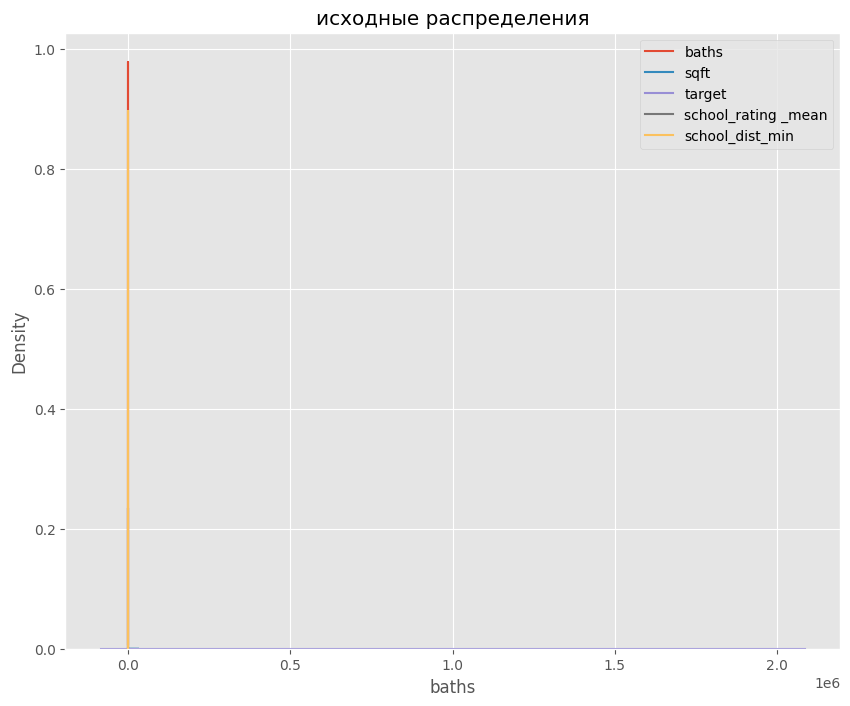

In [122]:

digital_features = ['baths', 'sqft', 'target', 'school_rating _mean', 'school_dist_min']

filtered_df = df[digital_features]

col_names = list(filtered_df.columns)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10,8))

ax1.set_title('исходные распределения')


sns.kdeplot(filtered_df['baths'], ax=ax1, label='baths')
sns.kdeplot(filtered_df['sqft'], ax=ax1, label='sqft')
sns.kdeplot(filtered_df['target'], ax=ax1, label='target')
sns.kdeplot(filtered_df['school_rating _mean'], ax=ax1, label='school_rating _mean')
sns.kdeplot(filtered_df['school_dist_min'], ax=ax1, label='school_dist_min')
plt.legend()


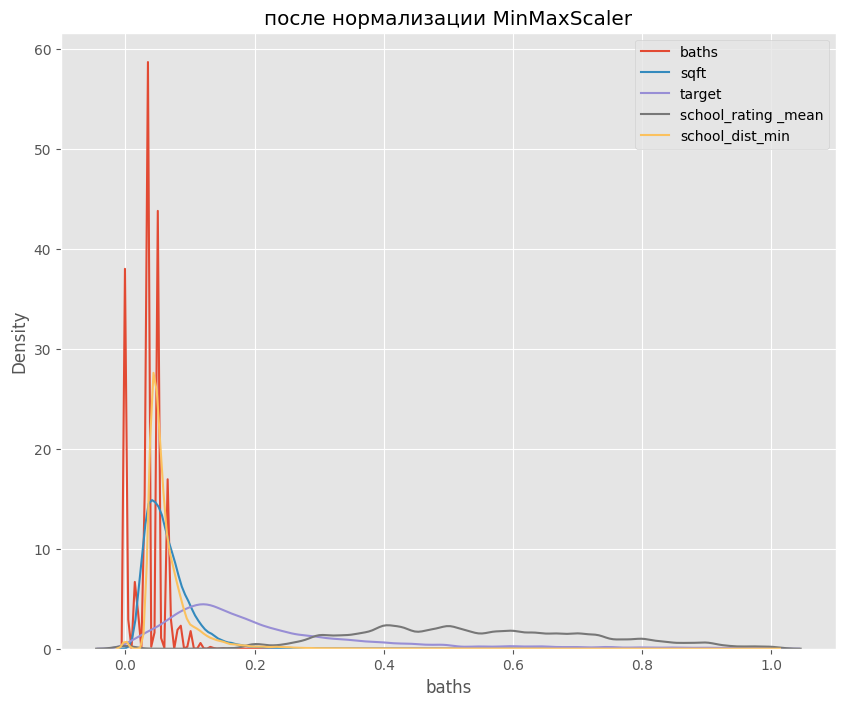

In [123]:
digital_features = ['baths', 'sqft', 'target', 'school_rating _mean', 'school_dist_min']

filtered_df = df[digital_features]

col_names = list(filtered_df.columns)

mm_scaler = MinMaxScaler()

df_mm = mm_scaler.fit_transform(filtered_df)

df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10,8))

ax1.set_title('после нормализации MinMaxScaler')


sns.kdeplot(df_mm['baths'], ax=ax1, label='baths')
sns.kdeplot(df_mm['sqft'], ax=ax1, label='sqft')
sns.kdeplot(df_mm['target'], ax=ax1, label='target')
sns.kdeplot(df_mm['school_rating _mean'], ax=ax1, label='school_rating _mean')
sns.kdeplot(df_mm['school_dist_min'], ax=ax1, label='school_dist_min')
plt.legend()

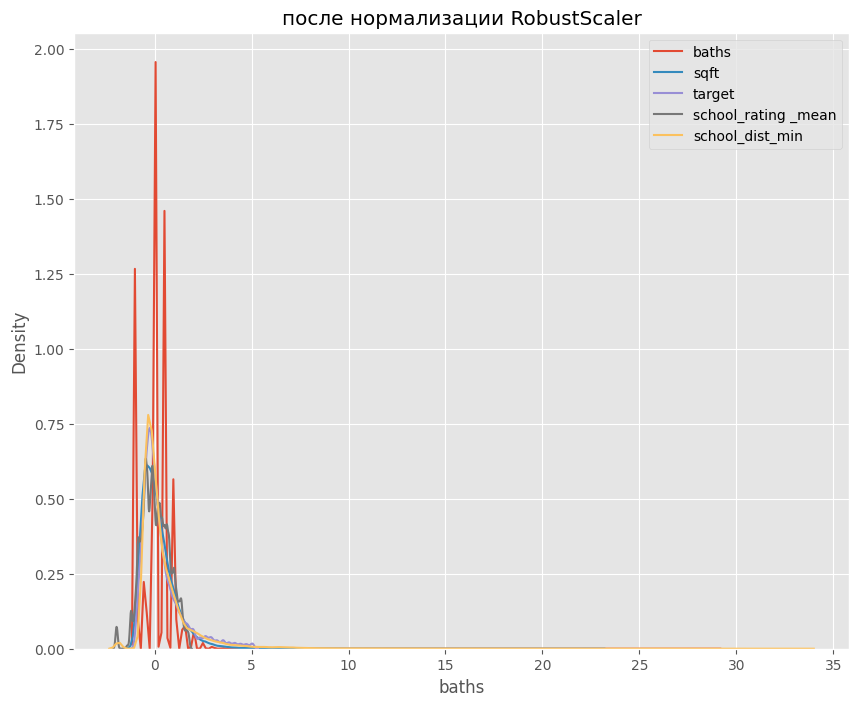

In [124]:
r_scaler = RobustScaler()

df_r = r_scaler.fit_transform(filtered_df)

df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10,8))

ax1.set_title('после нормализации RobustScaler')


sns.kdeplot(df_r['baths'], ax=ax1, label='baths')
sns.kdeplot(df_r['sqft'], ax=ax1, label='sqft')
sns.kdeplot(df_r['target'], ax=ax1, label='target')
sns.kdeplot(df_r['school_rating _mean'], ax=ax1, label='school_rating _mean')
sns.kdeplot(df_r['school_dist_min'], ax=ax1, label='school_dist_min')
plt.legend()

In [125]:
sort_1 = ((df['baths'] > 30) | (df['target'] > 1000000)) | (df['school_dist_min']> 30)
sorted_1_df = df[sort_1]
# Вывести отфильтрованные строки
print(len(sorted_1_df))


22698


In [126]:
df.drop(df[sort_1].index, inplace=True)

In [127]:
sort_2 = ((df['baths'] < 1) | (df['sqft'] < 1))
sorted_2_df = df[sort_2]
# Вывести отфильтрованные строки
print(len(sorted_2_df))

55898


In [128]:
# Удаляем Выбросы, соответствующие условию
df.drop(df[sort_2].index, inplace=True)

In [129]:
df['baths'].mean()

2.5181794148748677

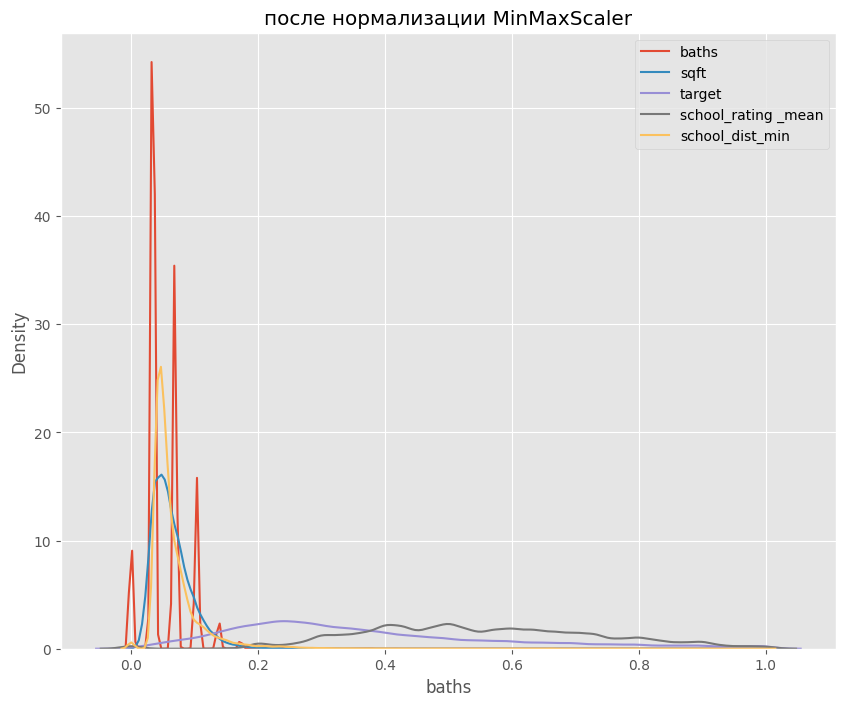

In [132]:
filtered_df = df[digital_features]

col_names = list(filtered_df.columns)

mm_scaler = MinMaxScaler()

df_mm = mm_scaler.fit_transform(filtered_df)

df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10,8))

ax1.set_title('после нормализации MinMaxScaler')


sns.kdeplot(df_mm['baths'], ax=ax1, label='baths')
sns.kdeplot(df_mm['sqft'], ax=ax1, label='sqft')
sns.kdeplot(df_mm['target'], ax=ax1, label='target')
sns.kdeplot(df_mm['school_rating _mean'], ax=ax1, label='school_rating _mean')
sns.kdeplot(df_mm['school_dist_min'], ax=ax1, label='school_dist_min')
plt.legend()

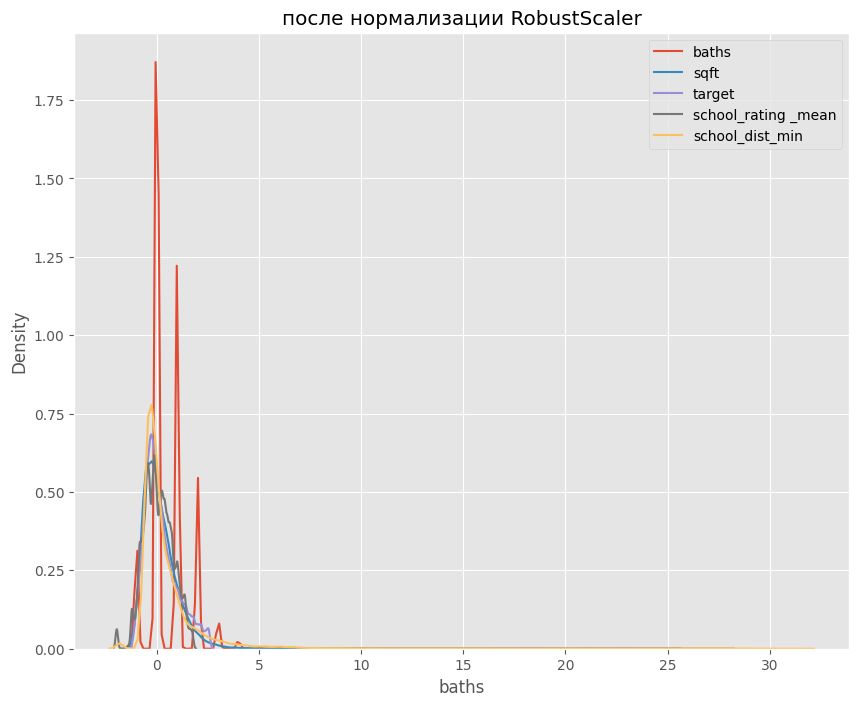

In [133]:
filtered_df = df[digital_features]

col_names = list(filtered_df.columns)

r_scaler = RobustScaler()

df_r = r_scaler.fit_transform(filtered_df)

df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10,8))

ax1.set_title('после нормализации RobustScaler')


sns.kdeplot(df_r['baths'], ax=ax1, label='baths')
sns.kdeplot(df_r['sqft'], ax=ax1, label='sqft')
sns.kdeplot(df_r['target'], ax=ax1, label='target')
sns.kdeplot(df_r['school_rating _mean'], ax=ax1, label='school_rating _mean')
sns.kdeplot(df_r['school_dist_min'], ax=ax1, label='school_dist_min')
plt.legend()

In [134]:
df['baths'].mean()

2.5181794148748677

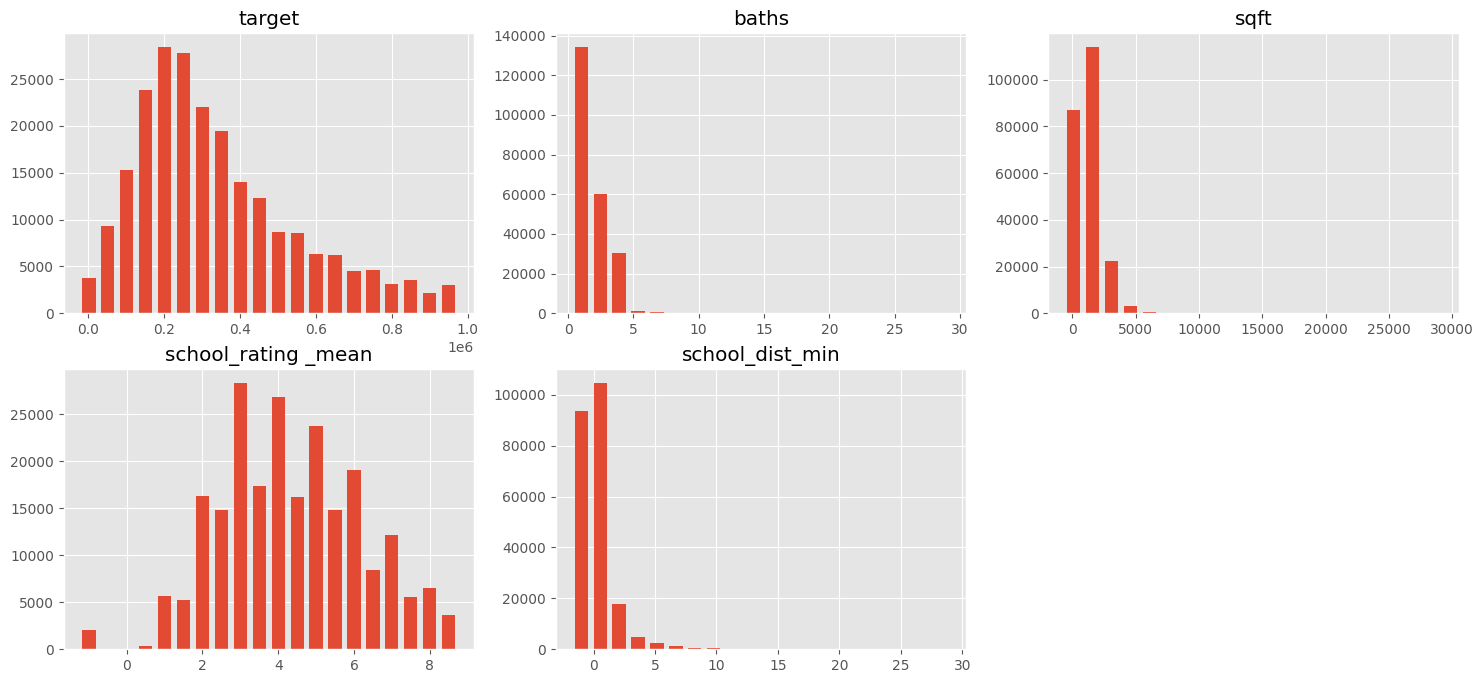

In [136]:
def visualize_distributions(titles_values_dict):
  columns = min(3, len(titles_values_dict))
  rows = (len(titles_values_dict) - 1) // columns + 1
  fig = plt.figure(figsize = (columns * 6, rows * 4))
  for i, (title, values) in enumerate(titles_values_dict.items()):
    hist, bins = np.histogram(values, bins = 20)
    ax = fig.add_subplot(rows, columns, i + 1)
    ax.bar(bins[:-1], hist, width = (bins[1] - bins[0]) * 0.7)
    ax.set_title(title)
  plt.show()
  
visualize_distributions({'target': df['target'], 'baths': df['baths'],'sqft': df['sqft'],'school_rating _mean': df['school_rating _mean'],'school_dist_min': df['school_dist_min'],})

In [144]:
cat_features = ['status','city','zipcode','state','propertyType','Year built']
for col in cat_features:
   unique_values = df[col].nunique()
   print(f"Количество уникальных значений в категориальной колонке {col}: {unique_values}")

Количество уникальных значений в категориальной колонке status: 66
Количество уникальных значений в категориальной колонке city: 1571
Количество уникальных значений в категориальной колонке zipcode: 4108
Количество уникальных значений в категориальной колонке state: 34
Количество уникальных значений в категориальной колонке propertyType: 12
Количество уникальных значений в категориальной колонке Year built: 207


In [233]:
df_normolized = df.copy()

In [ ]:
r_scaler = RobustScaler()
for column in digital_features:
       df_normolized[column] = r_scaler.fit_transform(df_normolized[[column]])[:,0]



## Кодирование признаков

In [317]:
df_coded = df_normolized.copy()

In [ ]:
to_ohe = ['fireplace', 'PrivatePool', 'Heating', 'Cooling','Parking']

labelE = LabelEncoder()

for column in to_ohe:
    df_coded[column] = labelE.fit_transform(df_coded[[column]])

In [319]:


bin_encoder = ce.BinaryEncoder(df_coded['propertyType'])
propertyType_bin = bin_encoder.fit_transform(df_coded['propertyType'])
df_coded = pd.concat([df_coded,propertyType_bin], axis=1)

bin_encoder = ce.BinaryEncoder(df_coded['status'])
status_bin = bin_encoder.fit_transform(df_coded['status'])
df_coded = pd.concat([df_coded,status_bin], axis=1)

bin_encoder = ce.BinaryEncoder(df_coded['state'])
state_bin = bin_encoder.fit_transform(df_coded['state'])
df_coded = pd.concat([df_coded,state_bin], axis=1)

bin_encoder = ce.BinaryEncoder(df_coded['city'])
city_bin = bin_encoder.fit_transform(df_coded['city'])
df_coded = pd.concat([df_coded,city_bin], axis=1)

bin_encoder = ce.BinaryEncoder(df_coded['zipcode'])
zipcode_bin = bin_encoder.fit_transform(df_coded['zipcode'])
df_coded = pd.concat([df_coded,zipcode_bin], axis=1)

bin_encoder = ce.BinaryEncoder(df_coded['Year built'])
Yearbuilt_bin = bin_encoder.fit_transform(df_coded['Year built'])
df_coded = pd.concat([df_coded,Yearbuilt_bin], axis=1)


df_coded.drop(['propertyType', 'status', 'state', 'city', 'zipcode', 'Year built'],axis=1,inplace=True)


## Моделирование

In [341]:
X = df_coded.drop(['target'], axis=1)
y = df_coded['target']


code_X_train, code_X_test, code_y_train, code_y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)


### BASELINE (LinearRegression)

In [342]:
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)

# вычисляем коэффициенты регрессии
model.fit(code_X_train, code_y_train)

# делаем предсказания с помощью модели
base_y_train_pred = model.predict(code_X_train)
base_y_test_pred = model.predict(code_X_test)


In [343]:
base_mse_train = metrics.mean_squared_error(code_y_train, base_y_train_pred)
base_mse_test = metrics.mean_squared_error(code_y_test, base_y_test_pred)
base_mae_train = metrics.mean_absolute_error(code_y_train, base_y_train_pred)
base_mae_test = metrics.mean_absolute_error(code_y_test, base_y_test_pred)
base_r2_train = metrics.r2_score(code_y_train, base_y_train_pred)
base_r2_test = metrics.r2_score(code_y_test, base_y_test_pred)

base_data = {'Metric': ['Train MSE', 'Test MSE', 'Train MAE', 'Test MAE', 'Train R^2', 'Test R^2'],
        'Baseline(LR)': [round(base_mse_train,2), round(base_mse_test,2), round(base_mae_train,2), round(base_mae_test,2), round(base_r2_train,2), round(base_r2_test,2)]}

base = pd.DataFrame(base_data)
base

,Metric,Baseline(LR)
0,Train MSE,0.45
1,Test MSE,0.45
2,Train MAE,0.51
3,Test MAE,0.51
4,Train R^2,0.31
5,Test R^2,0.31


### LinearRegression

In [ ]:
#le_model = LinearRegression(
    # fit_intercept=False)
    
#param_grid = {
#    'iterations': [100, 300, 500],
#    'learning_rate': [0.01, 0.03, 0.1],
#    'depth': [4, 6, 8],
#    'l2_leaf_reg': [1, 3, 5],}

#grid_search = GridSearchCV(estimator=cb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
#grid_search.fit(X_train, y_train, cat_features=cat_features)
#best_params = grid_search.best_params_



In [ ]:
lr_base_mse_train = metrics.mean_squared_error(code_y_train, base_y_train_pred)
lr_base_mse_test = metrics.mean_squared_error(code_y_test, base_y_test_pred)
lr_base_mae_train = metrics.mean_absolute_error(code_y_train, base_y_train_pred)
lr_base_mae_test = metrics.mean_absolute_error(code_y_test, base_y_test_pred)
lr_base_r2_train = metrics.r2_score(code_y_train, base_y_train_pred)
lr_base_r2_test = metrics.r2_score(code_y_test, base_y_test_pred)

lr_data = {'Metric': ['Train MSE', 'Test MSE', 'Train MAE', 'Test MAE', 'Train R^2', 'Test R^2'],
        'Baseline(LR)': [round(lr_base_mse_train,2), round(lr_base_mse_test,2), round(lr_base_mae_train,2), round(lr_base_mae_test,2), round(lr_base_r2_train,2), round(lr_base_r2_test,2)]}

lr = pd.DataFrame(lr_data)
lr

### RandomForestRegression

In [344]:
# Создаем экземпляр модели RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

# Обучаем модель на обучающих данных
rf_regressor.fit(code_X_train, code_y_train)

# Предсказания на обучающих и тестовых данных
rfr_y_train_pred = rf_regressor.predict(code_X_train)
rfr_y_test_pred = rf_regressor.predict(code_X_test)


In [345]:
rfr_mse_train = metrics.mean_squared_error(code_y_train, rfr_y_train_pred)
rfr_mse_test = metrics.mean_squared_error(code_y_test, rfr_y_test_pred)
rfr_mae_train = metrics.mean_absolute_error(code_y_train, rfr_y_train_pred)
rfr_mae_test = metrics.mean_absolute_error(code_y_test, rfr_y_test_pred)
rfr_r2_train = metrics.r2_score(code_y_train, rfr_y_train_pred)
rfr_r2_test = metrics.r2_score(code_y_test, rfr_y_test_pred)

rfr_data = {'Metric': ['Train MSE', 'Test MSE', 'Train MAE', 'Test MAE', 'Train R^2', 'Test R^2'],
        'RandomForestRegressor': [round(rfr_mse_train,2), round(rfr_mse_test,2), round(rfr_mae_train,2), round(rfr_mae_test,2), round(rfr_r2_train,2), round(rfr_r2_test,2)]}

rfr = pd.DataFrame(rfr_data)
rfr

,Metric,RandomForestRegressor
0,Train MSE,0.02
1,Test MSE,0.14
2,Train MAE,0.09
3,Test MAE,0.24
4,Train R^2,0.97
5,Test R^2,0.79


### ElasticNet

In [346]:
# Создаем и тренируем модель ElasticNetCV с кросс-валидацией по 5 фолдам
model_el = ElasticNetCV(cv=5, random_state=42)
model_el.fit(code_X_train, code_y_train)

# Предсказания для обучающей и тестовой выборок
encv_y_train_pred = model_el.predict(code_X_train)
encv_y_test_pred = model_el.predict(code_X_test)


In [347]:
encv_mse_train = metrics.mean_squared_error(code_y_train, encv_y_train_pred)
encv_mse_test = metrics.mean_squared_error(code_y_test, encv_y_test_pred)
encv_mae_train = metrics.mean_absolute_error(code_y_train, encv_y_train_pred)
encv_mae_test = metrics.mean_absolute_error(code_y_test, encv_y_test_pred)
encv_r2_train = metrics.r2_score(code_y_train, encv_y_train_pred)
encv_r2_test = metrics.r2_score(code_y_test, encv_y_test_pred)

encv_data = {'Metric': ['Train MSE', 'Test MSE', 'Train MAE', 'Test MAE', 'Train R^2', 'Test R^2'],
        'ElasticNetCV': [round(encv_mse_train,2), round(encv_mse_test,2), round(encv_mae_train,2), round(encv_mae_test,2), round(encv_r2_train,2), round(encv_r2_test,2)]}

encv = pd.DataFrame(encv_data)
encv

,Metric,ElasticNetCV
0,Train MSE,0.45
1,Test MSE,0.45
2,Train MAE,0.51
3,Test MAE,0.51
4,Train R^2,0.31
5,Test R^2,0.31


### CatBooostRegression

In [ ]:

X = df_normolized.drop(['target'], axis=1)
y = df_normolized['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [ ]:

cb_model = CatBoostRegressor(random_seed=42, silent=True)

param_grid = {
    'iterations': [100, 300, 500],
    'learning_rate': [0.01, 0.03, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],}

grid_search = GridSearchCV(estimator=cb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train, cat_features=cat_features)
best_params = grid_search.best_params_

best_cb_model = CatBoostRegressor(iterations=best_params['iterations'], learning_rate=best_params['learning_rate'], depth=best_params['depth'], l2_leaf_reg=best_params['l2_leaf_reg'], random_seed=42, silent=True)
best_cb_model.fit(X_train, y_train, cat_features=cat_features)

y_train_pred = best_cb_model.predict(X_train)
y_test_pred = best_cb_model.predict(X_test)

In [336]:
catB_mse_train = metrics.mean_squared_error(y_train, y_train_pred)
catB_mse_test = metrics.mean_squared_error(y_test, y_test_pred)
catB_mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
catB_mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
catB_r2_train = metrics.r2_score(y_train, y_train_pred)
catB_r2_test = metrics.r2_score(y_test, y_test_pred)

catB_data = {'Metric': ['Train MSE', 'Test MSE', 'Train MAE', 'Test MAE', 'Train R^2', 'Test R^2'],
        'CatBoostRegressor': [round(catB_mse_train,2), round(catB_mse_test,2), round(catB_mae_train,2), round(catB_mae_test,2), round(catB_r2_train,2), round(catB_r2_test,2)]}

catB = pd.DataFrame(catB_data)
catB

,Metric,CatBoostRegressor
0,Train MSE,0.10
1,Test MSE,0.12
2,Train MAE,0.22
3,Test MAE,0.23
4,Train R^2,0.84
5,Test R^2,0.82


### Comparing of models results

In [348]:
data = {'Metric': ['Train MSE', 'Test MSE', 'Train MAE', 'Test MAE', 'Train R2', 'Test R2'],
        'Baseline(LR)': [round(base_mse_train,2), round(base_mse_test,2), round(base_mae_train,2), round(base_mae_test,2), round(base_r2_train,2), round(base_r2_test,2)],
        #'LinearRegression': [round(lr_base_mse_train,2), round(lr_base_mse_test,2), round(lr_base_mae_train,2), round(lr_base_mae_test,2), round(lr_base_r2_train,2), round(lr_base_r2_test,2)],
        'RandomForestRegressor': [round(rfr_mse_train,2), round(rfr_mse_test,2), round(rfr_mae_train,2), round(rfr_mae_test,2), round(rfr_r2_train,2), round(rfr_r2_test,2)],
        'ElasticNetCV': [round(encv_mse_train,2), round(encv_mse_test,2), round(encv_mae_train,2), round(encv_mae_test,2), round(encv_r2_train,2), round(encv_r2_test,2)],
        'CatBoostRegressor': [round(catB_mse_train,2), round(catB_mse_test,2), round(catB_mae_train,2), round(catB_mae_test,2), round(catB_r2_train,2), round(catB_r2_test,2)]}

compare = pd.DataFrame(data)
compare

,Metric,Baseline(LR),RandomForestRegressor,ElasticNetCV,CatBoostRegressor
0,Train MSE,0.45,0.02,0.45,0.10
1,Test MSE,0.45,0.14,0.45,0.12
2,Train MAE,0.51,0.09,0.51,0.22
3,Test MAE,0.51,0.24,0.51,0.23
4,Train R2,0.31,0.97,0.31,0.84
5,Test R2,0.31,0.79,0.31,0.82


## Conteinerization